#Epsilon-Greedy simple implementation:

This code initializes the variables needed for the algorithm, loops through a specified number of plays, and performs the Epsilon-Greedy action selection for each play. 

It then simulates a reward for the chosen arm and updates the Q-value and N-value for that arm based on the reward. Finally, it prints the final Q-values after all plays have been completed.

    Initialize a list of N arms, each with an unknown reward probability.

    Set a value for epsilon, which represents the probability of exploration. For example, if epsilon = 0.1, then 10% of the time we will explore a random arm, and 90% of the time we will choose the arm with the highest estimated reward.

    For each round or iteration:
    a. With probability epsilon, choose a random arm to explore.
    b. Otherwise, choose the arm with the highest estimated reward.
    c. Observe the reward from the chosen arm.
    d. Update the estimated reward for the chosen arm based on the observed reward.

    Repeat step 3 for a fixed number of rounds or until convergence.

Here are some variables you will need to use:

    N: the number of arms
    epsilon: the probability of exploration
    Q: a list of length N to store the estimated reward for each arm
    N_pulls: a list of length N to store the number of times each arm has been pulled
    a function to calculate the average reward for each arm

To implement step 3d, you will need to update the estimated reward for the chosen arm using the following formula:
Q[a] = Q[a] + (r - Q[a]) / N_pulls[a]

where a is the index of the chosen arm, r is the observed reward, and N_pulls[a] is the number of times the arm has been pulled before.

### PS: (the cumulative average reward)

The cumulative average reward is the average reward received up to a certain point in time. It is calculated by dividing the sum of all rewards up to that point by the number of times an action has been taken up to that point. In the context of reinforcement learning, it is used to evaluate the performance of different algorithms. The cumulative average reward gives an idea of how well an algorithm is learning and adapting to the environment over time. A higher cumulative average reward indicates better performance.

One way to make the optimal reward more visible in the plot is to calculate the cumulative average reward and plot it along with the instantaneous reward. This allows you to see the trend of rewards over time and identify the optimal reward more easily.

In [11]:
import random

# Initialize variables
num_arms = 10
epsilon = 0.1
q_values = [0] * num_arms
n_values = [0] * num_arms
rewards = []
optimal_arms = []
cumulative_rewards = [0]

# Loop for each play
for play in range(1000):

    # Epsilon-Greedy action selection
    if random.uniform(0, 1) < epsilon:
        # Choose a random arm
        arm = random.randint(0, num_arms-1)
    else:
        # Choose the arm with the highest Q-value
        arm = q_values.index(max(q_values))

    # Simulate reward for chosen arm
    reward = random.gauss(0, 1)

    # Update Q-value and N-value for chosen arm
    n_values[arm] += 1
    q_values[arm] += (1/n_values[arm]) * (reward - q_values[arm])

    # Track rewards and optimal actions
    rewards.append(reward)
    optimal_arms.append(arm == q_values.index(max(q_values)))
    cumulative_rewards.append(cumulative_rewards[-1] + reward)

# Print final Q-values
print(q_values)


[0.0751578694194035, 0.09731711748560325, 0.0040082054761591025, -0.14405611605586546, 0.03270198285491494, -0.16918112468034896, 0.11047910702354116, 0.052114740798554715, -0.4367653945975141, -0.3275233122577989]


#This block is for showing the results:

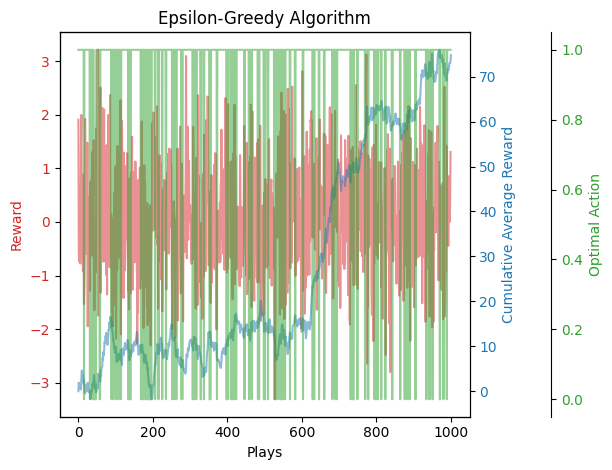

In [12]:
import matplotlib.pyplot as plt

# Plot results
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Plays')
ax1.set_ylabel('Reward', color=color)
ax1.plot(range(1000), rewards, color=color, alpha=0.5, label='Instantaneous Reward')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Cumulative Average Reward', color=color)
ax2.plot(range(1001), cumulative_rewards, color=color, alpha=0.5, label='Cumulative Average Reward')
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()  # instantiate a third axes that shares the same x-axis

color = 'tab:green'
ax3.spines["right"].set_position(("axes", 1.2))
ax3.set_ylabel('Optimal Action', color=color)
ax3.plot(range(1000), optimal_arms, color=color, alpha=0.5, label='Optimal Action')
ax3.tick_params(axis='y', labelcolor=color)

plt.title('Epsilon-Greedy Algorithm')
fig.tight_layout()
plt.show()


This is a bit complex, so:

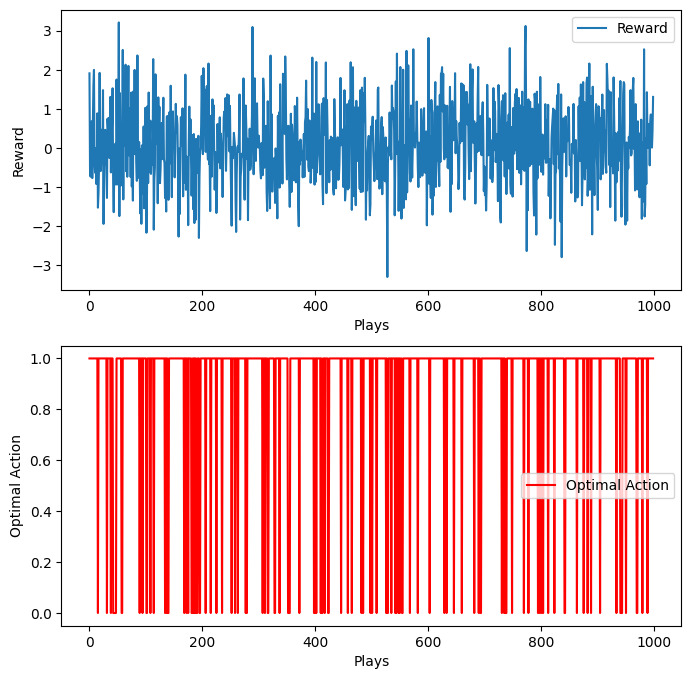

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))

# Plot reward in first subplot
ax1.plot(range(1000), rewards, label='Reward')
ax1.set_xlabel('Plays')
ax1.set_ylabel('Reward')
ax1.legend()

# Plot optimal action in second subplot
ax2.plot(range(1000), optimal_arms, label='Optimal Action', color='red')
ax2.set_xlabel('Plays')
ax2.set_ylabel('Optimal Action')
ax2.legend()

plt.show()

### PS: (the optimal action)
In the context of multi-armed bandit problems, the optimal action refers to the action that has the highest expected reward. In the epsilon-greedy algorithm, the algorithm selects the action with the highest estimated value (Q-value) with probability 1 - epsilon, and a random action with probability epsilon. This random action can sometimes lead to a non-optimal action being chosen, resulting in the value of the optimal action being less than 1. However, over time, as the algorithm learns and the Q-values become more accurate, the optimal action should be chosen more frequently, resulting in the value of the optimal action approaching 1.